In [68]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

df = pd.read_csv('loan.csv')

import the modules that will be needed

%matplotlib will place any graphs inline

In [69]:
df.head()

,Loan_ID,Gender,Marital_Status,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LI0100,Male,Single,0,Yes,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LI0101,Male,Married,1,Yes,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LI0102,Male,Married,0,Yes,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LI0103,Male,Married,0,No,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LI0104,Male,Single,0,Yes,No,6000,0.0,141.0,360.0,1.0,Urban,Y


.head() will show the first 5 rows

In [70]:
df.describe()

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

look at summary

In [72]:
df['Property_Area'].value_counts()

Semiurban    230
Urban        196
Rural        173
Name: Property_Area, dtype: int64

We can look at frequency to understand whether they make sense or not

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1426: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


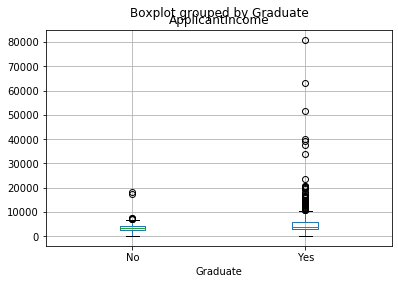

In [71]:
df.boxplot(column='ApplicantIncome', by = 'Graduate')

To understand distribution

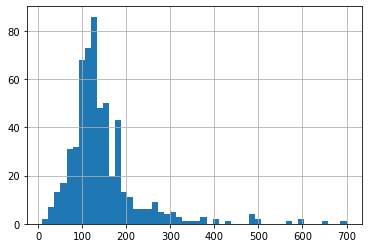

In [17]:
df['LoanAmount'].hist(bins=50)

Check for extreme values

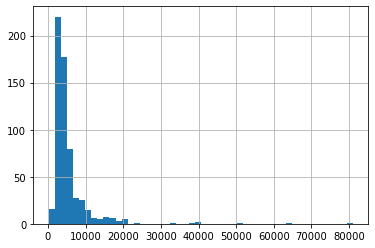

In [18]:
df['ApplicantIncome'].hist(bins=50)

Check for extreme values

In [73]:
temp1=df['Credit_History'].value_counts(ascending=True)
temp2=df.pivot_table(values='Loan_Status', index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())
print('Frequency Table for Credit History:')
print(temp1)

print('\nProbility of getting loan for each Credit History class:')
print(temp2)

Frequency Table for Credit History:
0.0     88
1.0    462
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.079545
1.0                0.792208


In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

In [23]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Marital_Status        3
Dependents           15
Graduate              0
Self_Employed        30
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

Identifies how many null values are present for each column.

In [25]:
df['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)

In [26]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Marital_Status        3
Dependents           15
Graduate              0
Self_Employed        30
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

Filled in null values in the Loan Amount column with mean values. Loan amount column now shows 0 cells with null value

In [97]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace=True)
#fill in missing values

In [27]:
df.dtypes

Loan_ID               object
Gender                object
Marital_Status        object
Dependents            object
Graduate              object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Tells what the data types are

In [98]:
df.mean()

ApplicantIncome      5420.687813
CoapplicantIncome    1563.913055
LoanAmount            145.434256
Loan_Amount_Term      342.461538
Credit_History          0.840000
dtype: float64

gives calculated means for each column that has numerical values

In [31]:
one = pd.DataFrame(np.random.randn(5,4))
one

,0,1,2,3
0,1.487475,-0.010491,0.477459,-1.301246
1,0.134686,0.931223,0.343246,1.479395
2,-0.281837,0.721379,0.516733,1.092291
3,-1.157537,0.258064,-0.313971,-0.709279
4,0.577030,0.763710,0.163843,0.077980


In [32]:
two = pd.DataFrame(np.random.randn(5,4))
two

,0,1,2,3
0,0.785715,-0.267709,-1.029808,0.047536
1,0.922660,0.775303,-0.901345,-0.776472
2,0.345393,-1.319866,-0.305481,-1.544229
3,-2.213740,0.550641,0.681529,-1.143130
4,2.239404,-1.238651,-1.488903,-0.867547


We created an array of specified shape and filled it with random values using numpy. We will be using this information to combine DataFrame objects using simple concatenation.

In [33]:
pd.concat([one,two])

,0,1,2,3
0,1.487475,-0.010491,0.477459,-1.301246
1,0.134686,0.931223,0.343246,1.479395
2,-0.281837,0.721379,0.516733,1.092291
3,-1.157537,0.258064,-0.313971,-0.709279
4,0.577030,0.763710,0.163843,0.077980
0,0.785715,-0.267709,-1.029808,0.047536
1,0.922660,0.775303,-0.901345,-0.776472
2,0.345393,-1.319866,-0.305481,-1.544229
3,-2.213740,0.550641,0.681529,-1.143130
4,2.239404,-1.238651,-1.488903,-0.867547


We concatenated the two datasets together using the concat() method

In [35]:
left = pd.DataFrame({'key':['foo', 'bar'], 'lval': [1,2]})
left

,key,lval
0,foo,1
1,bar,2


In [36]:
right = pd.DataFrame({'key': ['foo', 'bar', 'bar'], 'rval': [3,4,5]})
right

,key,rval
0,foo,3
1,bar,4
2,bar,5


DataFrames that do not have identical structures

In [38]:
pd.merge(left,right, on='key')

,key,lval,rval
0,foo,1,3
1,bar,2,4
2,bar,2,5


Merging two data frames that do not have the same structure using the merge() function. Requires that some common thread must exist between the two data frames.

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
#import models from scikit learn module

In [100]:
X = df.iloc[:,[8,10]].values

y = df.iloc[:,12].values

extracting the independent variables for credit history and loan amount and extracting the dependent values for loan status

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

Splitting the dataset into the Training set and the Test set

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
#Fitting Logistics Regression into Training Dataset
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)

Trains the data

In [ ]:
y_pred = classifier.predict(X_test)
y_pred
#predicting the test set results; for testing we only pass X

Tests the data

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm
#building the confusion matrix

Gives the accuracy of the model

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
#measures the accuracy